In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [3]:
fashion_datset=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_datset.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


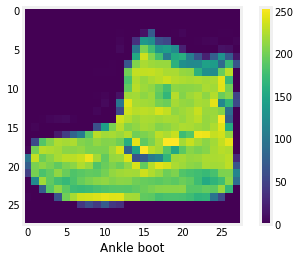

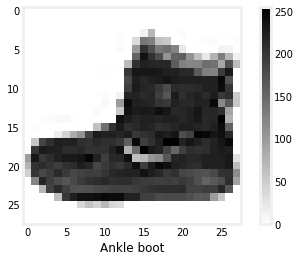

In [5]:
#ankle boot in color photo
plt.imshow(train_images[0])
plt.colorbar()
plt.xlabel(class_names[train_labels[0]])
plt.grid(False)
plt.show()
#ankle boot in black and white photo
plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images=train_images/255
test_images=test_images/255

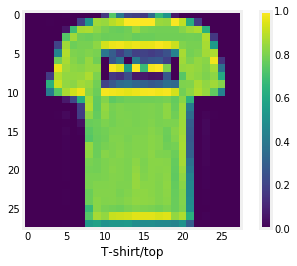

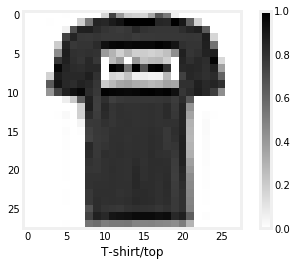

In [7]:
#ankle boot in color photo
plt.imshow(train_images[1])
plt.colorbar()
plt.xlabel(class_names[train_labels[1]])
plt.grid(False)
plt.show()
#ankle boot in black and white photo
plt.imshow(train_images[1],cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[1]])
plt.colorbar()
plt.grid(False)
plt.show()

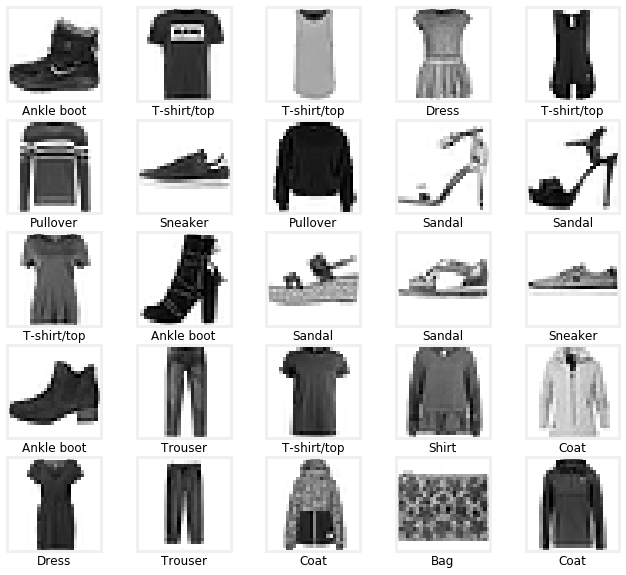

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
encoding1=OneHotEncoder()
y_train=np.array(train_labels)
y_train_OHE=encoding1.fit_transform(y_train.reshape(-1,1))
encoding2=OneHotEncoder()
y_test=np.array(test_labels)
y_test_OHE=encoding2.fit_transform(y_test.reshape(-1,1))

In [11]:
def creatingmodel(optimizer="adam",loss="categorical_crossentropy"):
    model=Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(Dense(128,activation="relu"))
    model.add(Dense(64,activation="relu"))
    model.add(Dense(10,activation="softmax"))
    model.compile(optimizer=optimizer,loss=loss,metrics=["accuracy"])
    return model
model=creatingmodel()
callbacks=EarlyStopping(monitor="val_loss",mode="min",patience=10)

In [12]:
model.fit(x=train_images,y=y_train_OHE,
          validation_data=(test_images,y_test_OHE),
          epochs=300,batch_size=50,verbose=1,
          callbacks=[callbacks])

Train on 60000 samples, validate on 10000 samples
Epoch 1/300
60000/60000 [==============================] - 6s 100us/sample - loss: 0.4992 - accuracy: 0.8231 - val_loss: 0.4208 - val_accuracy: 0.8523
Epoch 2/300
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3731 - accuracy: 0.8655 - val_loss: 0.4179 - val_accuracy: 0.8414
Epoch 3/300
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3351 - accuracy: 0.8778 - val_loss: 0.3626 - val_accuracy: 0.8710
Epoch 4/300
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3124 - accuracy: 0.8845 - val_loss: 0.3608 - val_accuracy: 0.8693
Epoch 5/300
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2939 - accuracy: 0.8901 - val_loss: 0.3501 - val_accuracy: 0.8719
Epoch 6/300
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2799 - accuracy: 0.8961 - val_loss: 0.3404 - val_accuracy: 0.8788
Epoch 7/300
60000/60000 [=======================

In [13]:
loss=pd.DataFrame(model.history.history)
loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.499180,0.823067,0.420786,0.8523
1,0.373118,0.865450,0.417865,0.8414
2,0.335143,0.877833,0.362605,0.8710
3,0.312432,0.884450,0.360815,0.8693
4,0.293884,0.890117,0.350077,0.8719


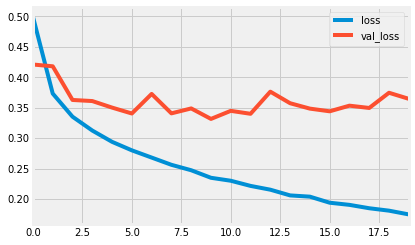

In [14]:
loss[["loss","val_loss"]].plot()

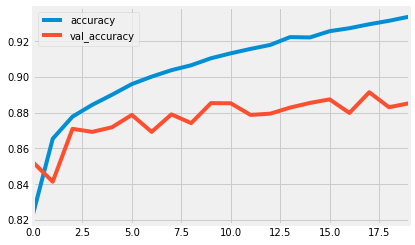

In [15]:
loss[["accuracy","val_accuracy"]].plot()

In [16]:
from sklearn.metrics import confusion_matrix,classification_report

In [17]:
y_pred_prob=model.predict(test_images)
y_pred=model.predict_classes(test_images)
y_original=y_test_OHE.toarray()
y_original=np.argmax(y_original,axis=1)

In [18]:
# analysing the results
print(confusion_matrix(y_original,y_pred))
print(classification_report(y_original,y_pred))

[[847   5  15  17   3   1 102   0  10   0]
 [  1 984   2   8   3   0   1   0   1   0]
 [ 25   3 864   8  56   0  42   0   2   0]
 [ 22  10  19 913  14   0  19   0   3   0]
 [  4   1 152  45 736   0  60   0   2   0]
 [  0   0   0   1   0 980   0   9   1   9]
 [112   5 107  31  51   0 681   0  13   0]
 [  0   0   0   0   0  53   0 922   0  25]
 [  6   0   4   4   4   9   1   3 969   0]
 [  0   0   0   0   0  15   1  27   0 957]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.74      0.86      0.80      1000
           3       0.89      0.91      0.90      1000
           4       0.85      0.74      0.79      1000
           5       0.93      0.98      0.95      1000
           6       0.75      0.68      0.71      1000
           7       0.96      0.92      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.97     

In [19]:
scores=model.evaluate(test_images,y_test_OHE)
print(model.metrics_names[1],scores[1]*100)

10000/10000 [==============================] - 1s 66us/sample - loss: 0.3645 - accuracy: 0.8853
accuracy 88.52999806404114


In [20]:
wrong_predictions=[]
for i in range(10000):
    if(y_original[i]!=y_pred[i]):
        wrong_predictions.append(i)
wrong_predictions[0:10]

[12, 17, 23, 25, 40, 42, 49, 51, 57, 68]

In [21]:
def plottingphoto(number):
    yp=y_pred[number]
    y=y_test_OHE[number].toarray()
    yo=np.argmax(y)
    if yp==yo:
        color="blue"
    else:
        color="red"
    plt.imshow(test_images[number])
    plt.grid(False)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.xlabel(class_names[yp]+" "+str(round(np.max(y_pred_prob[number])*100,2))+" %",color=color)

In [22]:
def plottingbargraph(number):
    yp=y_pred[number]
    y=y_test_OHE[number].toarray()
    yo=np.argmax(y)
    barplot=plt.bar(range(10),y_pred_prob[number],color="black")
    if yp==yo:
        barplot[yp].set_color("blue")
    else:
        barplot[yp].set_color("red")

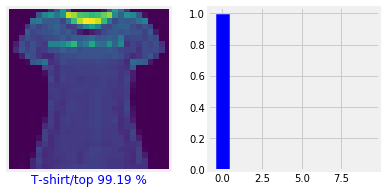

In [23]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plottingphoto(71)
plt.subplot(1,2,2)
plottingbargraph(71)
plt.show()

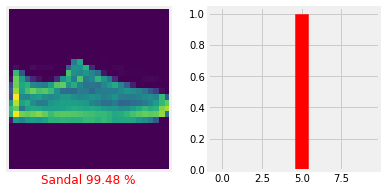

In [24]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plottingphoto(12)
plt.subplot(1,2,2)
plottingbargraph(12)
plt.show()

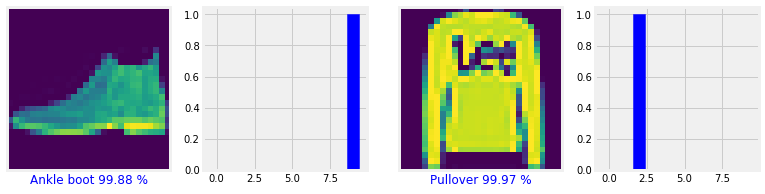

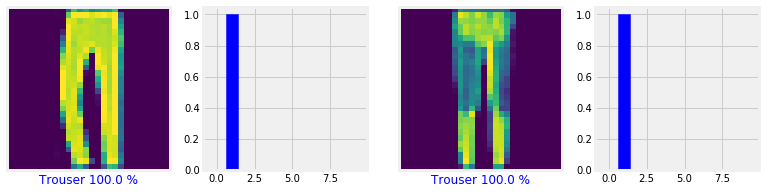

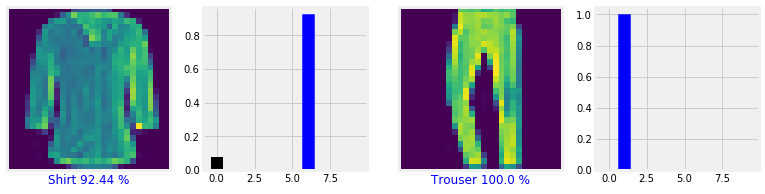

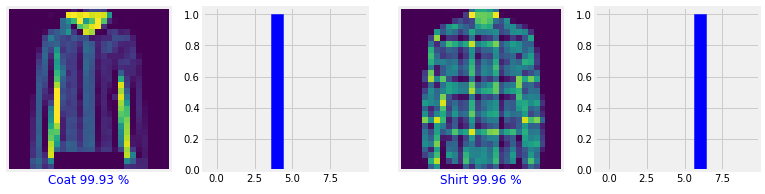

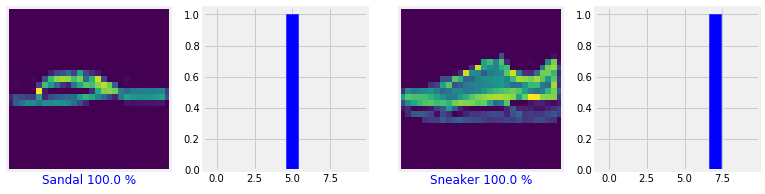

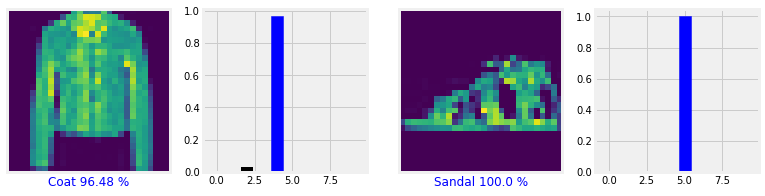

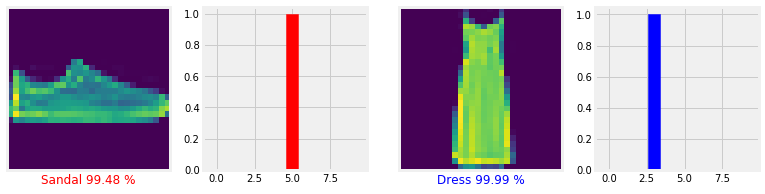

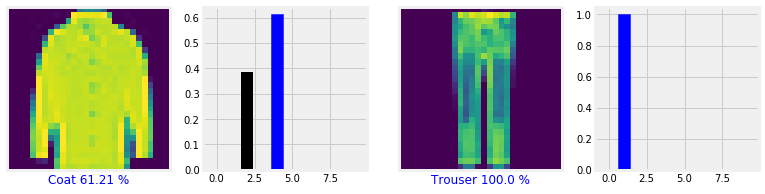

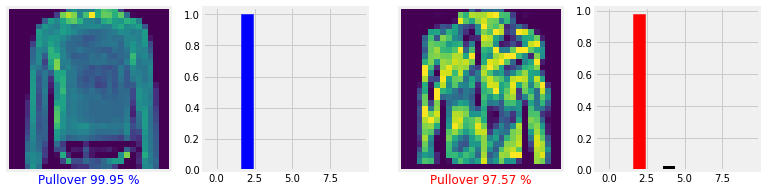

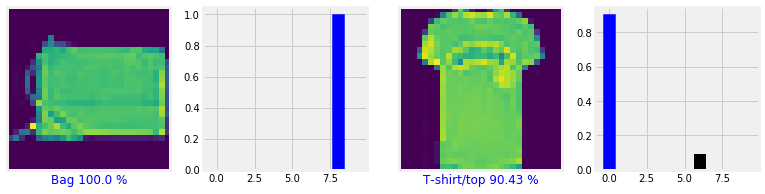

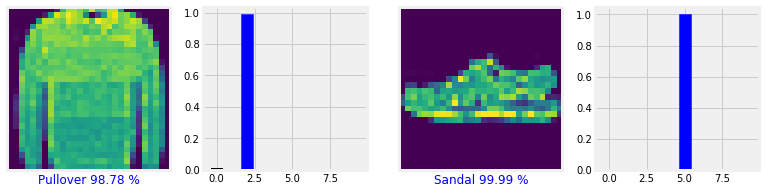

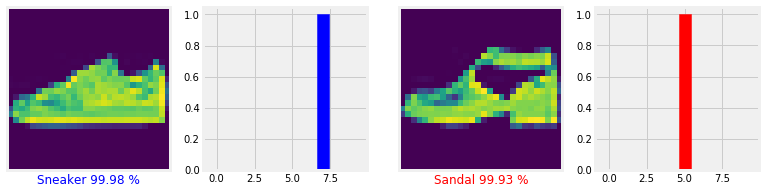

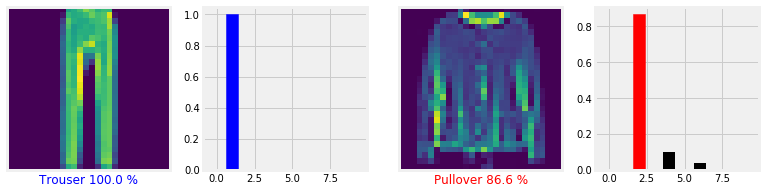

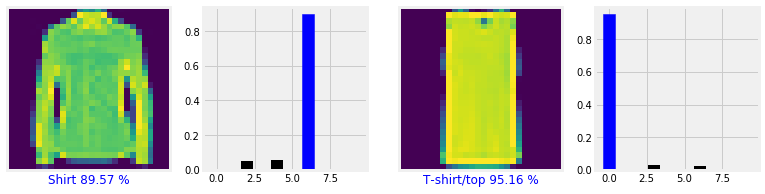

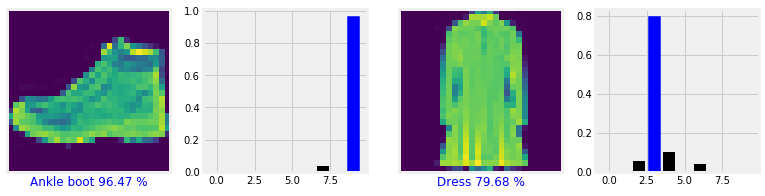

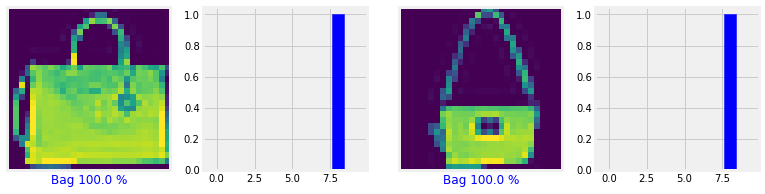

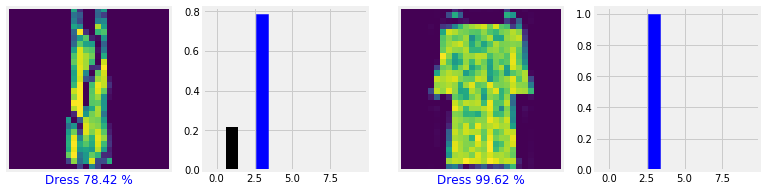

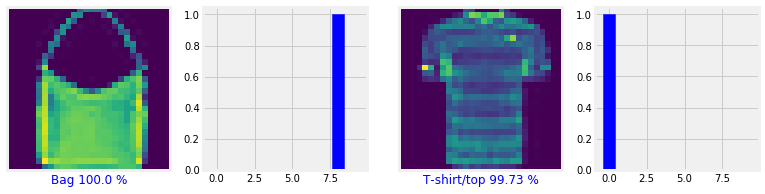

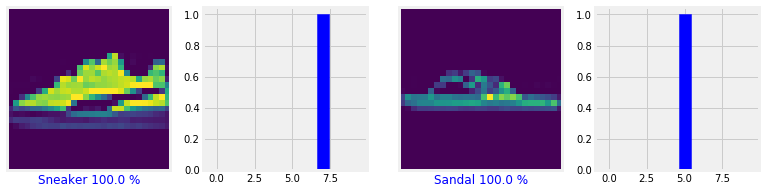

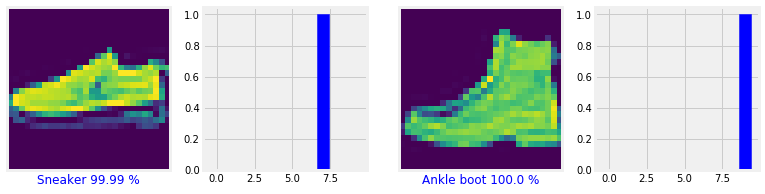

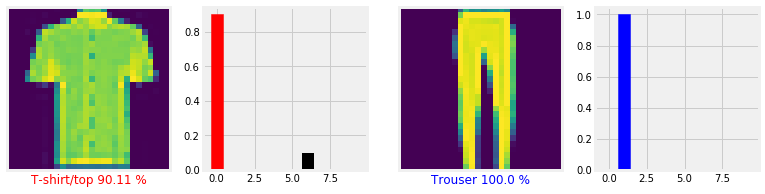

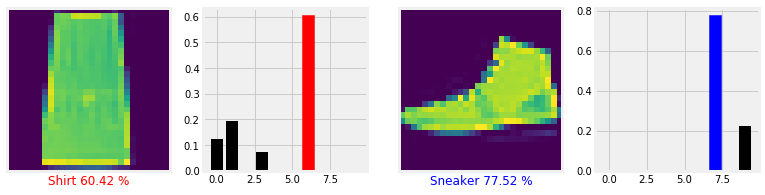

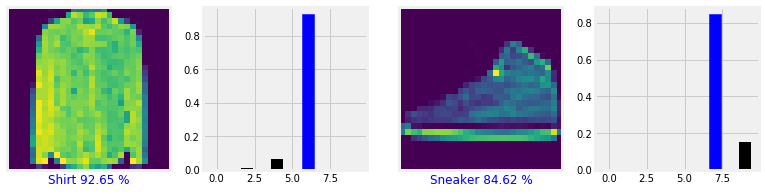

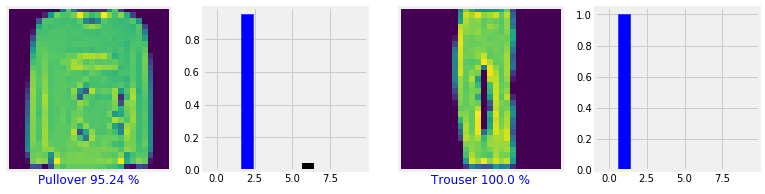

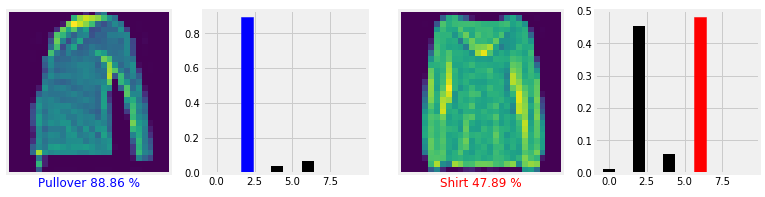

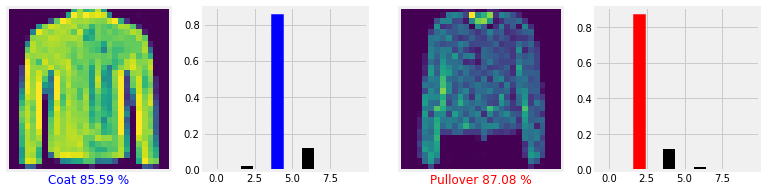

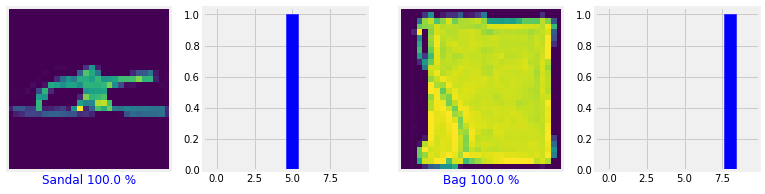

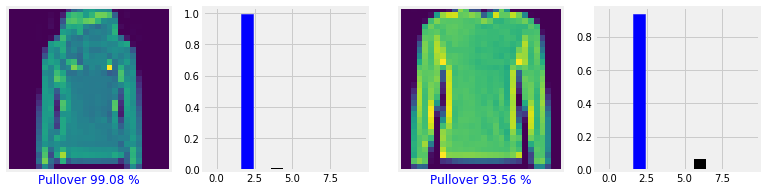

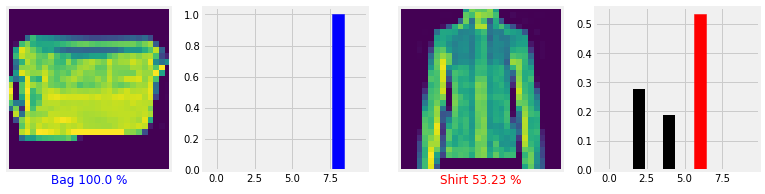

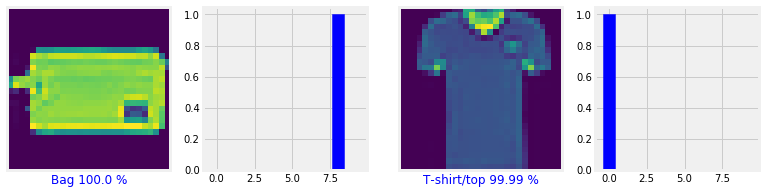

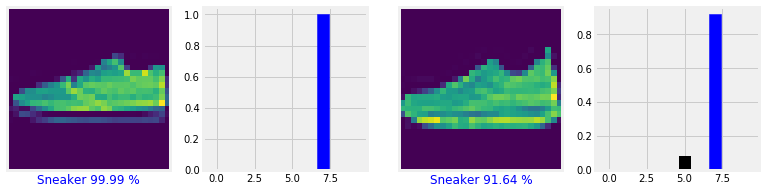

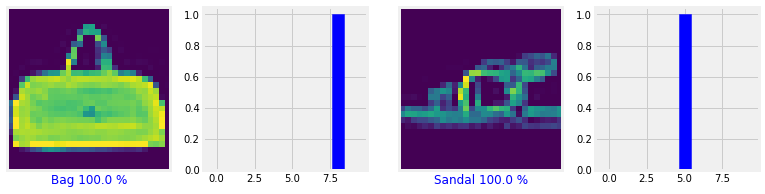

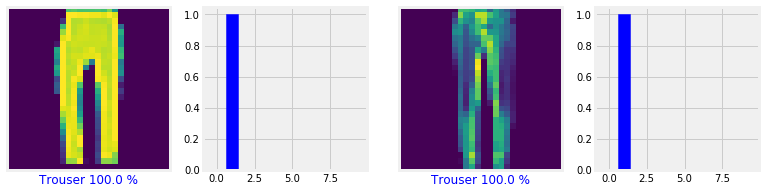

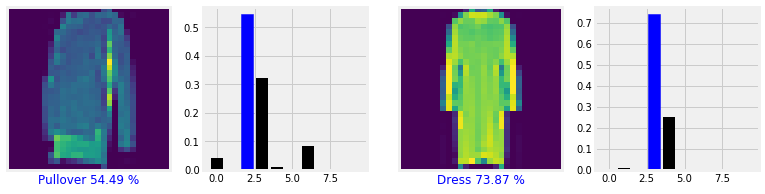

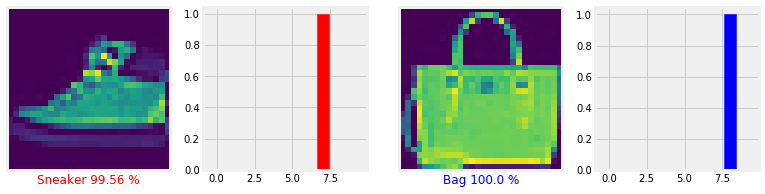

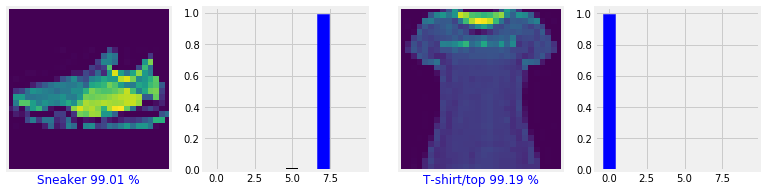

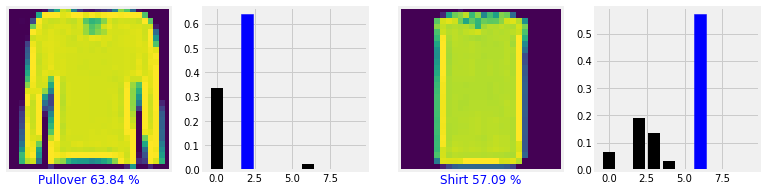

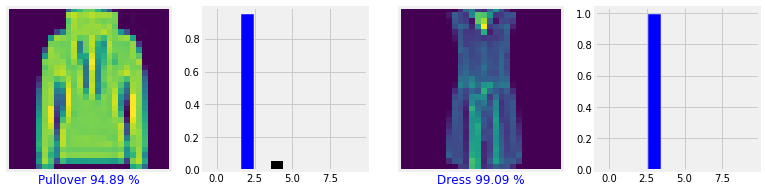

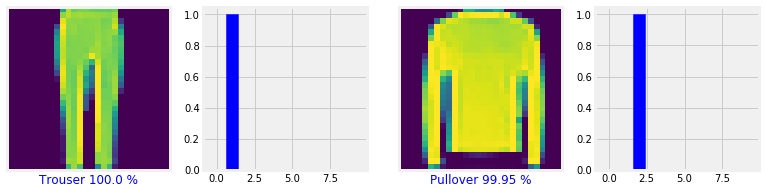

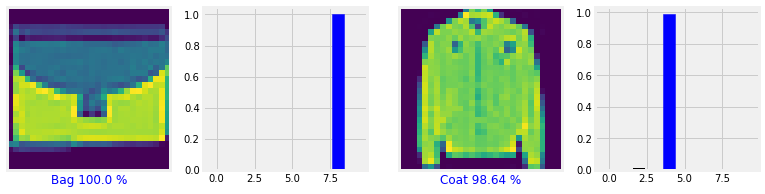

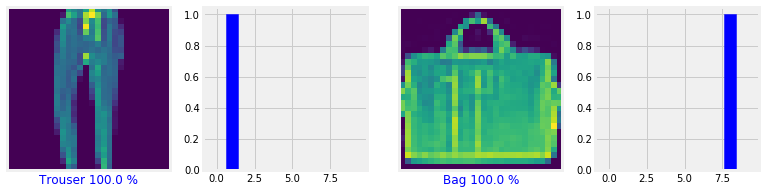

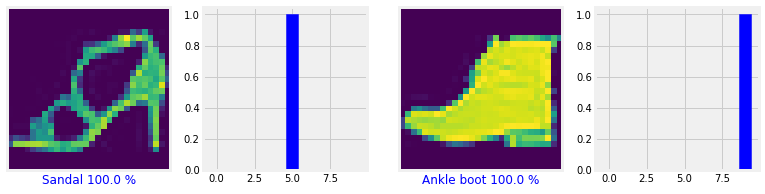

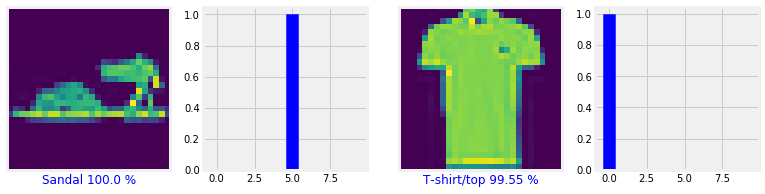

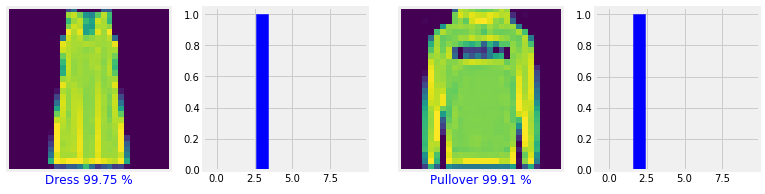

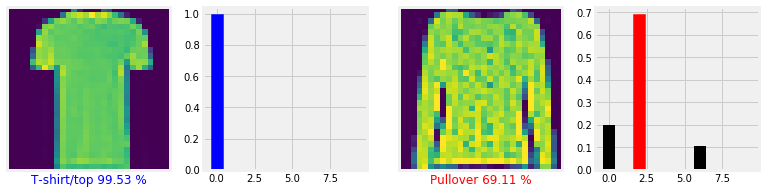

In [ ]:
j=0
for i in range(100):
    plt.figure(figsize=(12,3))
    plt.subplot(1,4,1)
    plottingphoto(j)
    plt.subplot(1,4,2)
    plottingbargraph(j)
    j=j+1
    plt.subplot(1,4,3)
    plottingphoto(j)
    plt.subplot(1,4,4)
    plottingbargraph(j)
    j=j+1
    plt.show()
    